In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [111]:
df=pd.read_csv("gayanagar.csv")
df.head()

,date,population
0,07-04-2022,23.0
1,08-06-2022,21.0
2,19-07-2022,26.0
3,10-09-2022,32.0
4,11-10-2022,28.0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        8 non-null      object 
 1   population  8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 272.0+ bytes


In [113]:
df.isnull().sum()

date          1
population    1
dtype: int64

In [114]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-114-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [115]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
 from prophet import Prophet

In [117]:
population=df.groupby('date')['population'].sum().reset_index()

In [118]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [119]:
model=Prophet(interval_width=0.95)

In [120]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/ngjlt87e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/1u3p8_x5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19533', 'data', 'file=/tmp/tmpqki2d_87/ngjlt87e.json', 'init=/tmp/tmpqki2d_87/1u3p8_x5.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modeldqnstifg/prophet_model-20230421062215.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:22:15 - cmdstanpy - INFO - Chain [1] start processing
INF

In [121]:
future_dates=model.make_future_dataframe(periods=30)

In [122]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-02-13  26.351328   19.787894   32.441971    26.351328    26.351328   
1  2022-04-03  26.360236   19.703702   32.900155    26.360236    26.360236   
2  2022-07-04  26.376962   20.323694   31.975014    26.376962    26.376962   
3  2022-07-19  26.379689   20.172800   32.414992    26.379689    26.379689   
4  2022-08-06  26.382961   20.305275   32.776931    26.382961    26.382961   
5  2022-10-09  26.394596   20.354665   32.692491    26.394596    26.394596   
6  2022-11-10  26.400414   20.436348   32.655183    26.400414    26.400414   
7  2022-12-22  26.408050   19.710367   32.886807    26.408050    26.408050   
8  2022-12-23  26.408231   20.320403   32.566925    26.408231    26.408231   
9  2022-12-24  26.408413   19.311640   32.445048    26.408413    26.408413   
10 2022-12-25  26.408595   20.321533   32.780855    26.408595    26.408595   
11 2022-12-26  26.408777   19.538371   32.565573    26.408777   

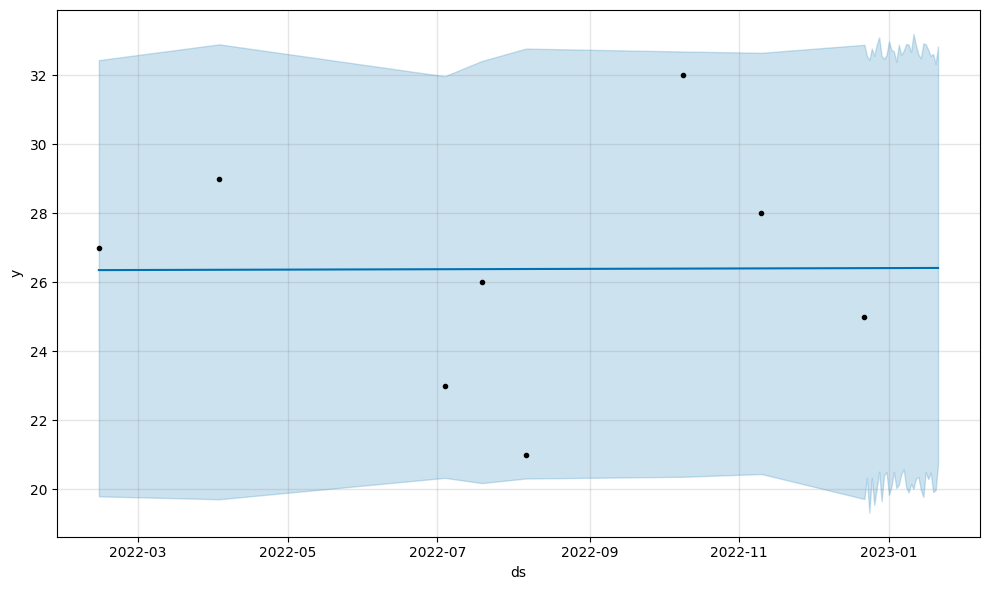

In [123]:
model.plot(forecast)
print(forecast)

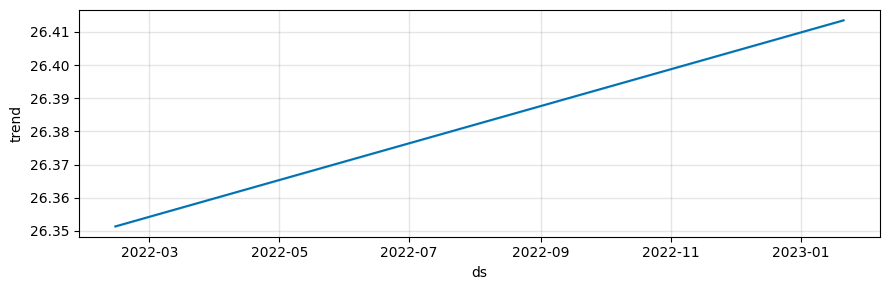

In [124]:
component=model.plot_components(forecast)

In [125]:
 model1=Prophet(interval_width=0.95)

In [126]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/f_o3qwhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/2z2phwai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8286', 'data', 'file=/tmp/tmpqki2d_87/f_o3qwhy.json', 'init=/tmp/tmpqki2d_87/2z2phwai.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_model_gkuvblh/prophet_model-20230421062230.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:22:30 - cmdstanpy - INFO - Chain [1] start processing
INFO

In [127]:
future_dates=model1.make_future_dataframe(periods=10)

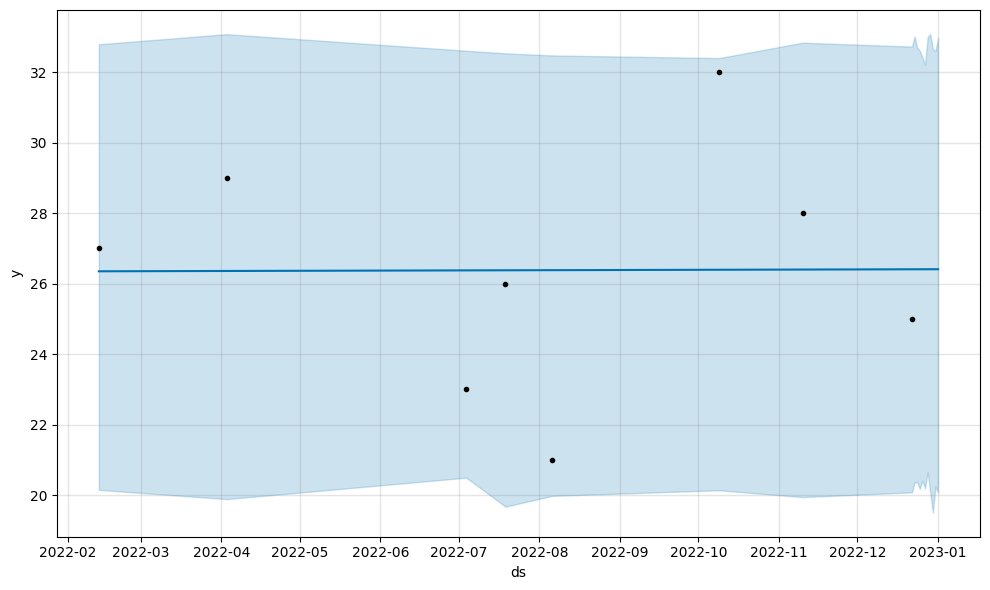

In [128]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-02-13  26.351328   20.150023   32.792663    26.351328    26.351328   
1  2022-04-03  26.360236   19.887405   33.079618    26.360236    26.360236   
2  2022-07-04  26.376962   20.495851   32.608838    26.376962    26.376962   
3  2022-07-19  26.379689   19.672771   32.535738    26.379689    26.379689   
4  2022-08-06  26.382961   19.980467   32.475678    26.382961    26.382961   
5  2022-10-09  26.394596   20.137985   32.400280    26.394596    26.394596   
6  2022-11-10  26.400414   19.944434   32.837106    26.400414    26.400414   
7  2022-12-22  26.408050   20.080046   32.727152    26.408050    26.408050   
8  2022-12-23  26.408231   20.361665   33.013957    26.408231    26.408231   
9  2022-12-24  26.408413   20.359768   32.703520    26.408413    26.408413   
10 2022-12-25  26.408595   20.175863   32.601967    26.408595    26.408595   
11 2022-12-26  26.408777   20.408983   32.430334    26.408777   

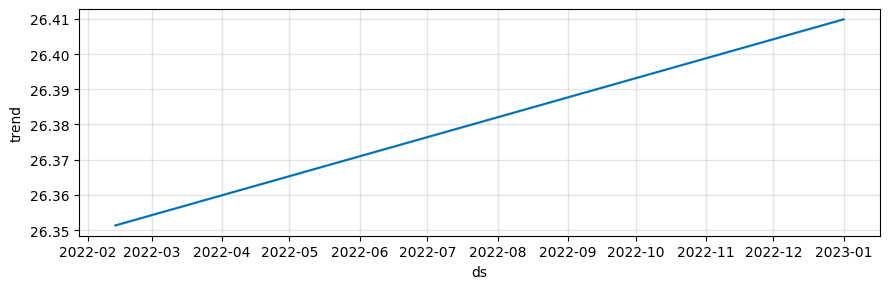

In [129]:
week=model1.plot_components(forecasting)
print(forecasting)